## Tasca S8.01. Visualitzacions en Python

## NIVELL 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

Primer importem les llibraries necessàries per fer les visualitzacions i funcions específiques que ens demanen al llarg d'aquest sprint.

In [113]:
# Importem els mòduls
import matplotlib.pyplot as plt     # Per crear gràfics
import numpy as np      # Per realitzar operacions estadísitiques
import pandas as pd     # Per treballar amb dades estructurades
import seaborn as sns       # Per la visualització de dades estadístiques
import mysql.connector      # Per establir la connexió i realitzar operacions amb la base de dades MySQL

Establim la connexió entre la base de bades de MySQL Workbench i Python

In [114]:
def connection():
    # Connexió amb la base de dades MySQL 
    connection = mysql.connector.connect(
        host="localhost",
        user="maria",
        password="marmota",
        database="test"
    )
    return connection



Consulta SQL para obtener la información de la estructura de cada tabla
Este código se conecta a la base de datos 'test', obtiene la lista de tablas en esa base de datos utilizando la consulta SQL SHOW TABLES, y luego itera sobre cada tabla para obtener su estructura utilizando la consulta DESCRIBE. Finalmente, imprime la información de cada columna de cada tabla. Esto te dará una descripción detallada de la estructura de cada tabla, incluidos los nombres de las columnas y los tipos de datos.

In [115]:
# La función get_tables es crida amb aquesta connexió per recuperar la llista de taules
def get_tables(conn):
    # Crea un objecte cursor per executar consultes SQL
    cursor = conn.cursor()
    
    # Defineix la consulta SQL per obtenir la llista de taules de la base de dades
    cursor.execute("SHOW TABLES")
    
    # Obté totes les taules del resultat
    tables = cursor.fetchall()
    
    # Tanca el cursor
    cursor.close()
    
    return tables
def get_table_info(conn, table_name):
    # Crea un objecte cursor per executar consultes SQL
    cursor = conn.cursor()
    
    # Defineix la consulta SQL per obtenir l'estructura de la taula
    cursor.execute(f"DESCRIBE {table_name}")
    
    # Obté l'estructura de la taula del resultat
    table_info = cursor.fetchall()
    
    # Tanca el cursor
    cursor.close()
    
    return table_info

# Estableix la connexió
conn = connection()

# Obté la llista de taules de la base de dades
tables = get_tables(conn)

# Itera sobre cada taula i imprimeix la seva informació
for table in tables:
    table_name = table[0]
    print(f"Taula: {table_name}")
    table_info = get_table_info(conn, table_name)
    for column_info in table_info:
        print(column_info)

# Tanca la connexió
conn.close()

Taula: companies
('company_id', 'varchar(15)', 'NO', 'PRI', None, '')
('company_name', 'varchar(255)', 'YES', '', None, '')
('phone', 'varchar(15)', 'YES', '', None, '')
('email', 'varchar(100)', 'YES', '', None, '')
('country', 'varchar(100)', 'YES', '', None, '')
('website', 'varchar(255)', 'YES', '', None, '')
Taula: credit_cards
('id', 'varchar(15)', 'NO', 'PRI', None, '')
('user_id', 'int(11)', 'YES', '', None, '')
('iban', 'varchar(100)', 'YES', '', None, '')
('pan', 'varchar(100)', 'YES', '', None, '')
('pin', 'varchar(100)', 'YES', '', None, '')
('cvv', 'varchar(15)', 'YES', '', None, '')
('track1', 'varchar(255)', 'YES', '', None, '')
('track2', 'varchar(255)', 'YES', '', None, '')
('expiring_date', 'varchar(25)', 'YES', '', None, '')
Taula: products
('id', 'int(11)', 'NO', 'PRI', None, 'auto_increment')
('product_name', 'varchar(100)', 'YES', '', None, '')
('price', 'decimal(10,2)', 'YES', '', None, '')
('colour', 'varchar(50)', 'YES', '', None, '')
('weight', 'decimal(10,2)'

In [116]:
tables

[('companies',),
 ('credit_cards',),
 ('products',),
 ('transactions',),
 ('transactions_products',),
 ('users',)]

**Exercici 1**

Una variable numèrica

Seleccionem el preu com a variable numèrica.

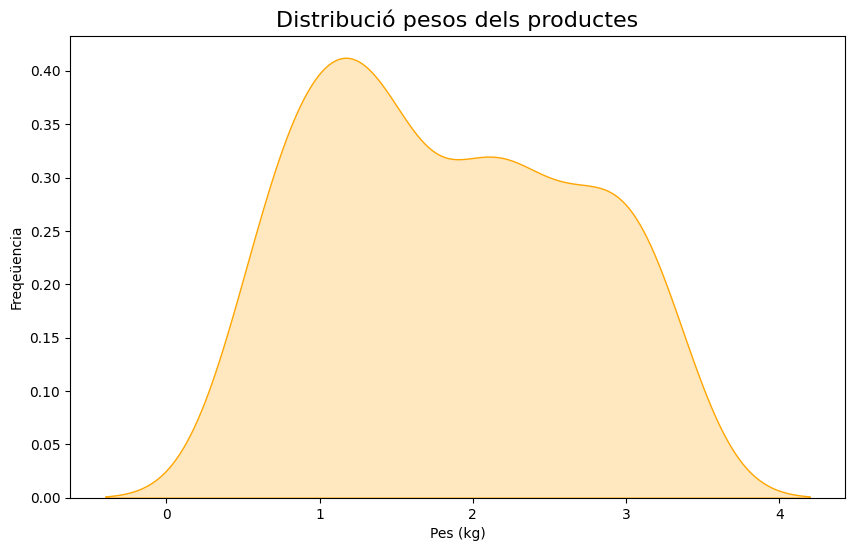

In [124]:


conn = connection()


# Crea un objecte cursor per executar consultes SQL
cursor = conn.cursor()

# Defineix la consulta SQL per obtenir la llista de taules de la base de dades
cursor.execute("select price, weight from products")

rows = cursor.fetchall()
dataframe = pd.DataFrame(rows, columns=['price', 'weight'])

# Tanca el cursor
cursor.close()
    

# Comprova si la columna 'preu' existeix
if 'weight' in dataframe.columns:
    # Filtra les files on el 'preu' no és número
    dataframe = dataframe.dropna(subset=['weight'])

    plt.figure(figsize=(10, 6))

    # Create the KDE plot
    ax = sns.kdeplot(data=dataframe['weight'], fill=True, color='orange')

    # Configure axis labels and title
    plt.title('Distribució pesos dels productes', fontsize=16)
    plt.xlabel('Pes (kg)')
    plt.ylabel('Freqeüencia')

    # Show the plot
    plt.show()
else:
    print("La columna 'weight' no existe en la tabla 'products'.")


conn.close()

**Exercici 2**

Dues variables numèriques

Price i weight amb un scatterplot

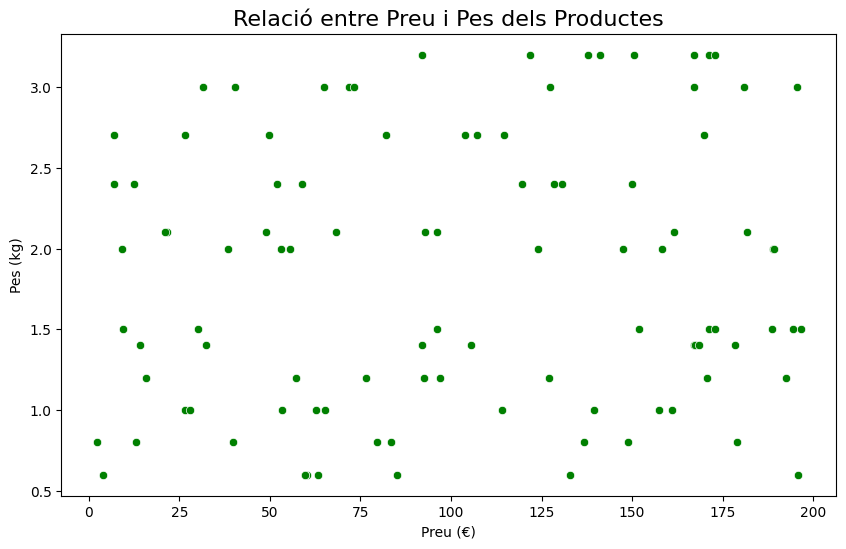

In [125]:
# Check if the 'price' and 'weight' columns exist in the DataFrame
if 'price' in dataframe.columns and 'weight' in dataframe.columns:
    # Filter out rows where 'price' or 'weight' is NaN
    dataframe = dataframe.dropna(subset=['price', 'weight'])

    plt.figure(figsize=(10, 6))

    # Create the scatter plot
    ax = sns.scatterplot(x=dataframe['price'], y=dataframe['weight'], color='green')

    # Configure axis labels and title
    plt.title('Relació entre Preu i Pes dels Productes', fontsize=16)
    plt.xlabel('Preu (€)')
    plt.ylabel('Pes (kg)')

    # Show the plot
    plt.show()
else:
    print("Las columnas 'price' y/o 'weight' no existen en la tabla 'products'.")

**Exercici 3**

Una variable categòrica

Per aquesta visualització utilitzarem la variable 'country' de la taula 'companies'. 

La visualització seleccionada és un 'lollipop plot', gràfic de piruleta, que no deixa de ser similar a un gràfic de barres, utilitzant una línia i un cercle a l'extrem. Hem ordenat els països on se situen les empreses en funció de la seva freqüència de més a menys. Així doncs, Suècia es col·loca en primera posició amb un total d'onze empreses d'aquest país, seguit per Països Baixos amb deu i Itàlia amb nou empreses.
Per la cua tenim Espanya amb una sola empresa, la Xina amb dos i França amb tres.



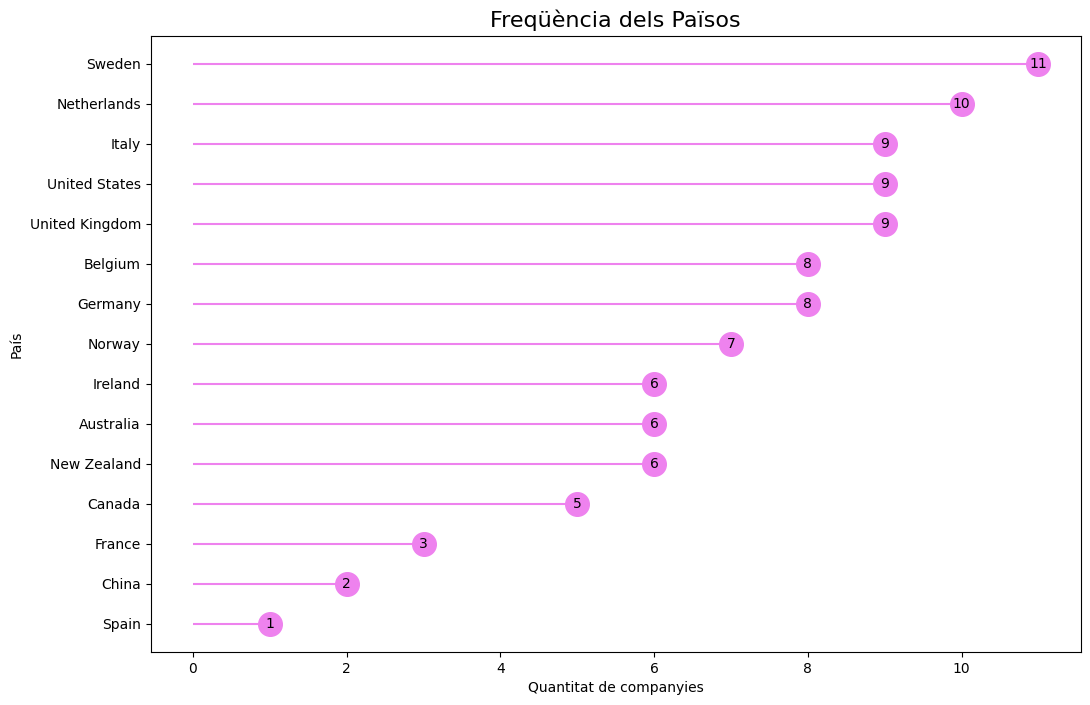

In [126]:

conn = connection()

# Fetch data from the companies table
cursor = conn.cursor()
cursor.execute("SELECT * FROM companies")
results = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
cursor.close()
conn.close()

# Convert the results to a pandas DataFrame
dataframe = pd.DataFrame(results, columns=column_names)

# Check if the 'country' column exists in the DataFrame
if 'country' in dataframe.columns:
    # Calculate the frequency of each country
    country_counts = dataframe['country'].value_counts().reset_index()
    country_counts.columns = ['country', 'count']
    
    # Sort the values for better visualization
    country_counts = country_counts.sort_values('count')

    plt.figure(figsize=(12, 8))

    # Create the lollipop plot
    plt.hlines(y=country_counts['country'], xmin=0, xmax=country_counts['count'], color='violet')
    plt.plot(country_counts['count'], country_counts['country'], "o", markersize=17, color='violet')

    # Add labels to the points
    for index, value in enumerate(country_counts['count']):
        plt.text(value, index, str(value), va='center', ha='center', fontsize=10)

    # Configure axis labels and title
    plt.title('Freqüència dels Països', fontsize=16)
    plt.xlabel('Quantitat de companyies')
    plt.ylabel('País')

    # Show the plot
    plt.show()
else:
    print("La columna 'country' no existe en la tabla 'companies'.")


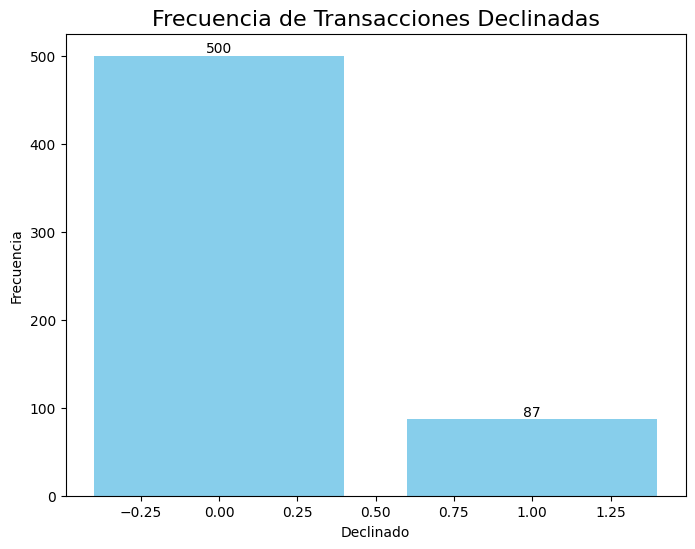

In [127]:
conn=connection()
# Obtener los resultados de la columna 'declined' de la tabla 'transactions'
cursor = conn.cursor()
cursor.execute("SELECT declined FROM transactions")
results = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
cursor.close()
conn.close()

# Convertir los resultados en un DataFrame de pandas
dataframe = pd.DataFrame(results, columns=column_names)

# Verificar si la columna 'declined' existe en el DataFrame
if 'declined' in dataframe.columns:
    # Calcular la frecuencia de los valores de 'declined'
    declined_counts = dataframe['declined'].value_counts().reset_index()
    declined_counts.columns = ['declined', 'count']

    plt.figure(figsize=(8, 6))

    # Crear el gráfico de barras
    plt.bar(declined_counts['declined'], declined_counts['count'], color='skyblue')

    # Añadir etiquetas a las barras
    for index, value in enumerate(declined_counts['count']):
        plt.text(index, value, str(value), va='bottom', ha='center', fontsize=10)

    # Configurar etiquetas de los ejes y título
    plt.title('Frecuencia de Transacciones Declinadas', fontsize=16)
    plt.xlabel('Declinado')
    plt.ylabel('Frecuencia')

    # Mostrar el gráfico
    plt.show()
else:
    print("La columna 'declined' no existe en la tabla 'transactions'.")


**Exercici 4**

Una variable categòrica i una numèrica

   amount        country
0  293.57        Germany
1  119.36        Germany
2  312.50      Australia
3  480.13      Australia
4  239.87  United States


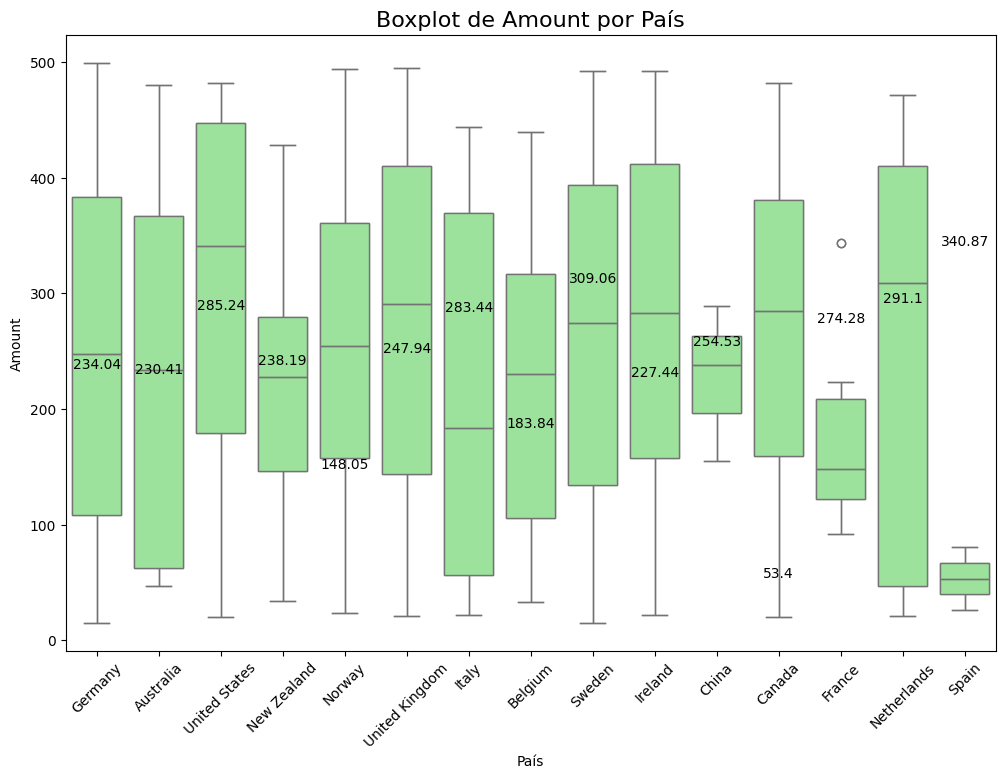

In [129]:
# Establish connection
conn = connection()

# Define the SQL query to join 'transactions' and 'companies' tables
filter_query = """
SELECT t.amount, c.country
FROM transactions t
INNER JOIN companies c ON t.business_id = c.company_id
"""

# Create a cursor object to execute SQL queries
cursor = conn.cursor()
# Define the SQL query to check if there are results
cursor.execute(filter_query)
# Fetch all rows from the result
results = cursor.fetchall()
# Get column names from the cursor
column_names = [i[0] for i in cursor.description]
# Close the cursor
cursor.close()

# Close the connection
conn.close()

# Convert the results to a pandas DataFrame
dataframe = pd.DataFrame(results, columns=column_names)

# Show some rows of the DataFrame to verify it loaded correctly
print(dataframe.head())

# Check if both 'amount' and 'country' columns exist in the DataFrame
if 'amount' in dataframe.columns and 'country' in dataframe.columns:
    plt.figure(figsize=(12, 8))

    # Create the boxplot
    sns.boxplot(x='country', y='amount', data=dataframe, color='lightgreen')

    # Add labels to the boxplot
    ax = sns.boxplot(x='country', y='amount', data=dataframe, color='lightgreen')
    medians = dataframe.groupby(['country'])['amount'].median().values
    median_labels = [str(np.round(s, 2)) for s in medians]
    pos = range(len(medians))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
                horizontalalignment='center', size='medium', color='black')

    # Configure axis labels and title
    plt.title('Boxplot de Amount por País', fontsize=16)
    plt.xlabel('País')
    plt.ylabel('Amount')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()
else:
    print("Las columnas 'amount' y/o 'country' no existen en las tablas 'transactions' y 'users' respectivamente.")



**Exercici 5**

Dues variables categòriques

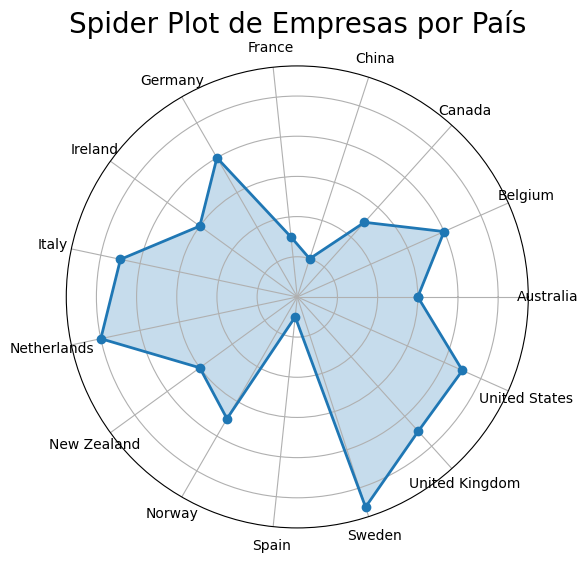

In [130]:
# Establecer conexión
conn = connection()

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Definir la consulta SQL para obtener la información de las empresas
query = "SELECT country, company_name FROM companies"

# Ejecutar la consulta
cursor.execute(query)

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor
cursor.close()


# Cerrar la conexión
conn.close()

# Convertir los resultados en un DataFrame de pandas
df = pd.DataFrame(results, columns=['country', 'company_name'])

# Contar el número de empresas por país
country_counts = df['country'].value_counts()

# Ordenar los países por número de empresas
country_counts_sorted = country_counts.sort_index()

# Crear el gráfico spider plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': 'polar'})

# Calcular el ángulo para cada país
angles = np.linspace(0, 2 * np.pi, len(country_counts_sorted), endpoint=False).tolist()

# Plotear las líneas del gráfico spider
values = country_counts_sorted.values.flatten().tolist()
values += values[:1]  # Para cerrar el gráfico
angles += angles[:1]  # Para cerrar el gráfico

ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)

# Etiquetar los países en el gráfico
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(country_counts_sorted.index, size=10)

# Configurar el título y mostrar el gráfico
plt.title('Spider Plot de Empresas por País', size=20)
plt.show()


**Exercici 6**

Tres variables

**Exercici 7**

Graficar un Pairplot

## NIVELL 2

**Exercici 1**

Correlació de totes les variables numèriques

**Exercici 2**

Implementa un jointplot

## NIVELL 3

**Exercici 1**

Implementa un violinplot combinat amb un altre tipus de gràfic

**Exercici 2**

Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament